In [57]:
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
from pykrx import stock
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

In [10]:
"""
분석 기간
"""
start_date = '20170101'
end_date = '20221231'

In [11]:
"""
분석 기업 -> 삼성전기
"""
code = '009150'

In [12]:
df_f = stock.get_market_fundamental(start_date, end_date, code, freq='y')

In [13]:
df_f

,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2017-12-31,54408,345.89,0.93,146,0.99,500
2018-12-31,54640,523.32,1.85,193,0.50,500
2019-12-31,54531,46.75,1.83,2139,0.75,750
2020-12-31,62126,14.57,2.04,8685,0.79,1000
2021-12-31,68106,26.45,2.64,6806,0.61,1100
2022-12-31,74385,24.33,2.61,7993,0.72,1400


In [ ]:
df_f = df_f.DPS

In [16]:
df_f = stock.get_market_fundamental(start_date, end_date, code, freq='d')

In [17]:
df_f

,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2017-01-02,54408,345.89,0.93,146,0.99,500
2017-01-03,54408,356.85,0.96,146,0.96,500
2017-01-04,54408,354.11,0.95,146,0.97,500
2017-01-05,54408,356.16,0.96,146,0.96,500
2017-01-06,54408,355.48,0.95,146,0.96,500
...,...,...,...,...,...,...
2022-12-23,88937,11.35,1.51,11811,1.57,2100
2022-12-26,88937,11.35,1.51,11811,1.57,2100
2022-12-27,88937,11.26,1.50,11811,1.58,2100


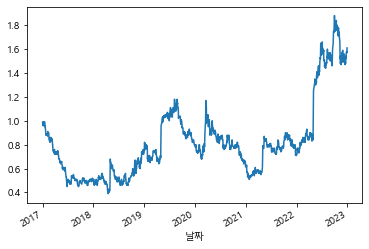

In [58]:
df_f.DIV.plot()
plt.show()

In [54]:
div_yields = savgol_filter(df_f.DIV, 51, 3)

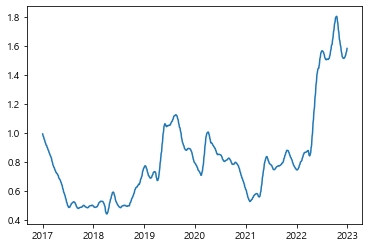

In [60]:
plt.plot(df_f.index.to_list(), div_yields)
plt.show()

In [21]:
df_p = stock.get_market_ohlcv(start_date, end_date, code)
df_p

,시가,고가,저가,종가,거래량,거래대금,등락률
날짜,,,,,,,
2017-01-02,50400,50800,49850,50500,264982,13383635250,-0.59
2017-01-03,51000,52300,50800,52100,545167,28309849400,3.17
2017-01-04,51800,52100,51300,51700,355343,18374772700,-0.77
2017-01-05,51900,52400,51500,52000,281546,14593472800,0.58
2017-01-06,52200,52800,51800,51900,265249,13815623000,-0.19
...,...,...,...,...,...,...,...
2022-12-23,135500,136500,133000,134000,264355,35521446000,-2.90
2022-12-26,134000,135500,133500,134000,211353,28455979500,0.00
2022-12-27,135000,136000,132000,133000,422061,56195883500,-0.75


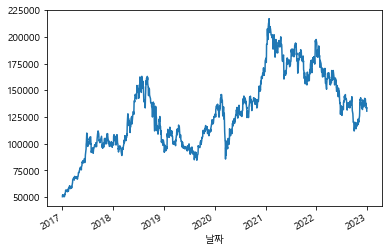

In [87]:
df_p.종가.plot()
plt.show()

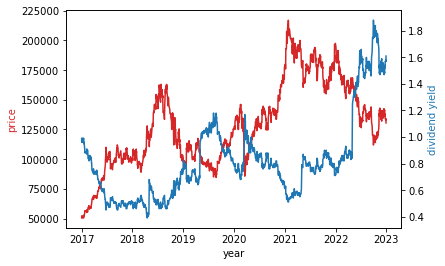

In [25]:
"""
주가 배당률 그리기
"""
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('price', color=color)
ax1.plot(df_p['종가'], color=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('dividend yield', color=color)
ax2.plot(df_f['DIV'], color=color)
plt.show()

In [27]:
np.corrcoef(df_p['종가'], df_f['DIV'])

array([[ 1.        , -0.03576827],
       [-0.03576827,  1.        ]])

"""
로우 패스 필터
"""

In [ ]:
div_yields = savgol_filter(df_f.DIV, 51, 3)

In [76]:
df_cur_f = stock.get_market_fundamental('20230214', '20230214', code)
df_cur_f

,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2023-02-14,88937,12.27,1.63,11811,1.45,2100


In [77]:
df_cur_p = stock.get_market_ohlcv('20230214', '20230214', code)
df_cur_p

,시가,고가,저가,종가,거래량,거래대금,등락률
날짜,,,,,,,
2023-02-14,145400,146900,144200,144900,236461,34347094700,0.21


In [78]:
cur_price = df_cur_p.종가[0]
cur_price

144900

In [79]:
div_min = min(div_yields)
div_min

0.44035766

In [80]:
div_max = max(div_yields)
div_max

1.8028383

In [81]:
cur_div = df_cur_f.DPS[0]
cur_div

2100

In [83]:
target_price = cur_div/div_min * 100
target_price

476885.08983279654

In [84]:
buy_price = cur_div/div_max * 100
buy_price

116482.9907538723

In [85]:
def get_percentage(input, min, max):
    return round((input - min) / (max - min) * 100)

def calculate_buy_score(current_div_yield, div_min, div_max):
    buy_score = get_percentage(current_div_yield, div_min, div_max)
    return buy_score

In [86]:
calculate_buy_score(df_cur_f.DIV[0], div_min, div_max)

74